In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv("cardata.csv")

In [80]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [81]:
#to check the shape
df.shape

(4340, 8)

In [82]:
#to check how many unique values
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())


['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [83]:
#to check the missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [84]:
#to describe the values
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [85]:
#to describe the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [86]:
# to analyse which column would help to fit for the model
finaldataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [87]:
#to finak the dataset
finaldataset.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [88]:
finaldataset['current_year'] = 2022

In [89]:
finaldataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022


In [90]:
finaldataset['noofyear'] = finaldataset['current_year']-finaldataset['year']

In [91]:
finaldataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,noofyear
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [92]:
#to drop the column
finaldataset.drop(['year'],axis = 1,inplace = True)

In [93]:
finaldataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,noofyear
0,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [94]:
#to drop the column
# inplace = true permanently delete from the dataset
finaldataset.drop(['current_year'],axis = 1,inplace = True)

In [95]:
finaldataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,noofyear
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [96]:
#to replace the sting into binary
#to show category as 0 or 1
final_dataset = pd.get_dummies(finaldataset,drop_first = True)

In [97]:
final_dataset.head()

,selling_price,km_driven,noofyear,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [98]:
#to find the correlation
final_dataset.corr()

,selling_price,km_driven,noofyear,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
noofyear,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [99]:
#to import the library
import seaborn as sns

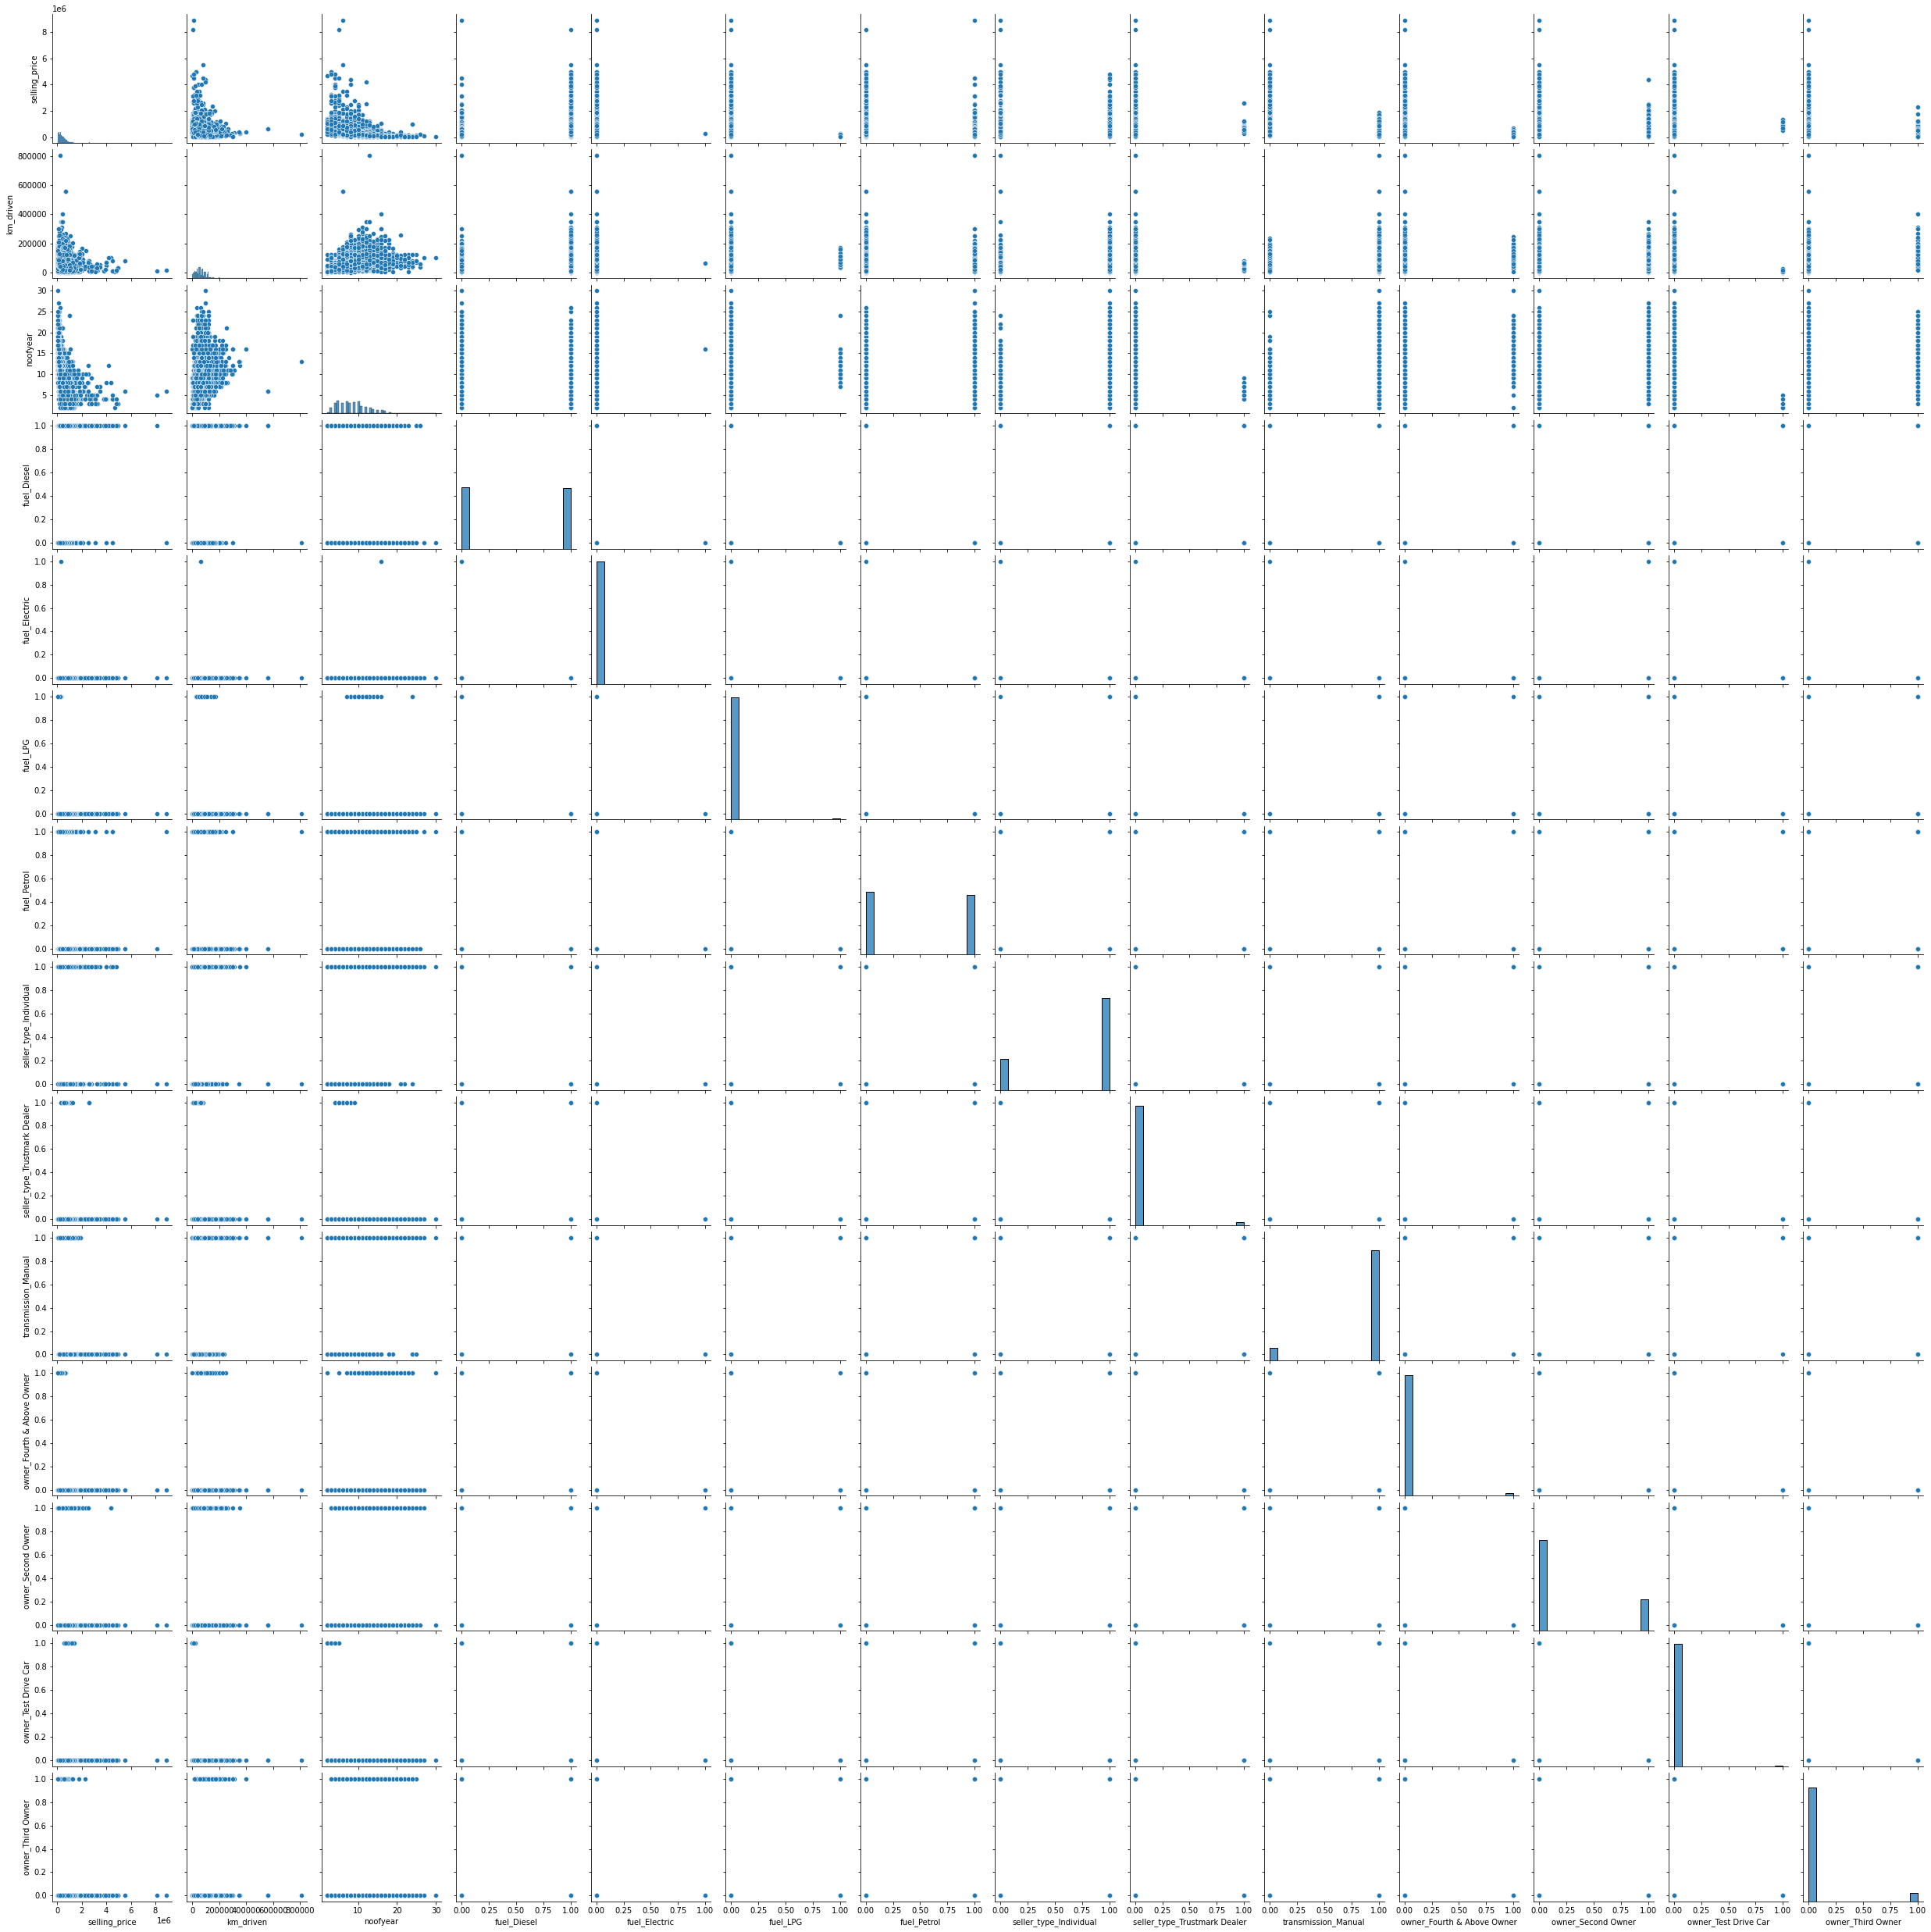

In [100]:
#to represent the features
sns.pairplot(final_dataset)

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

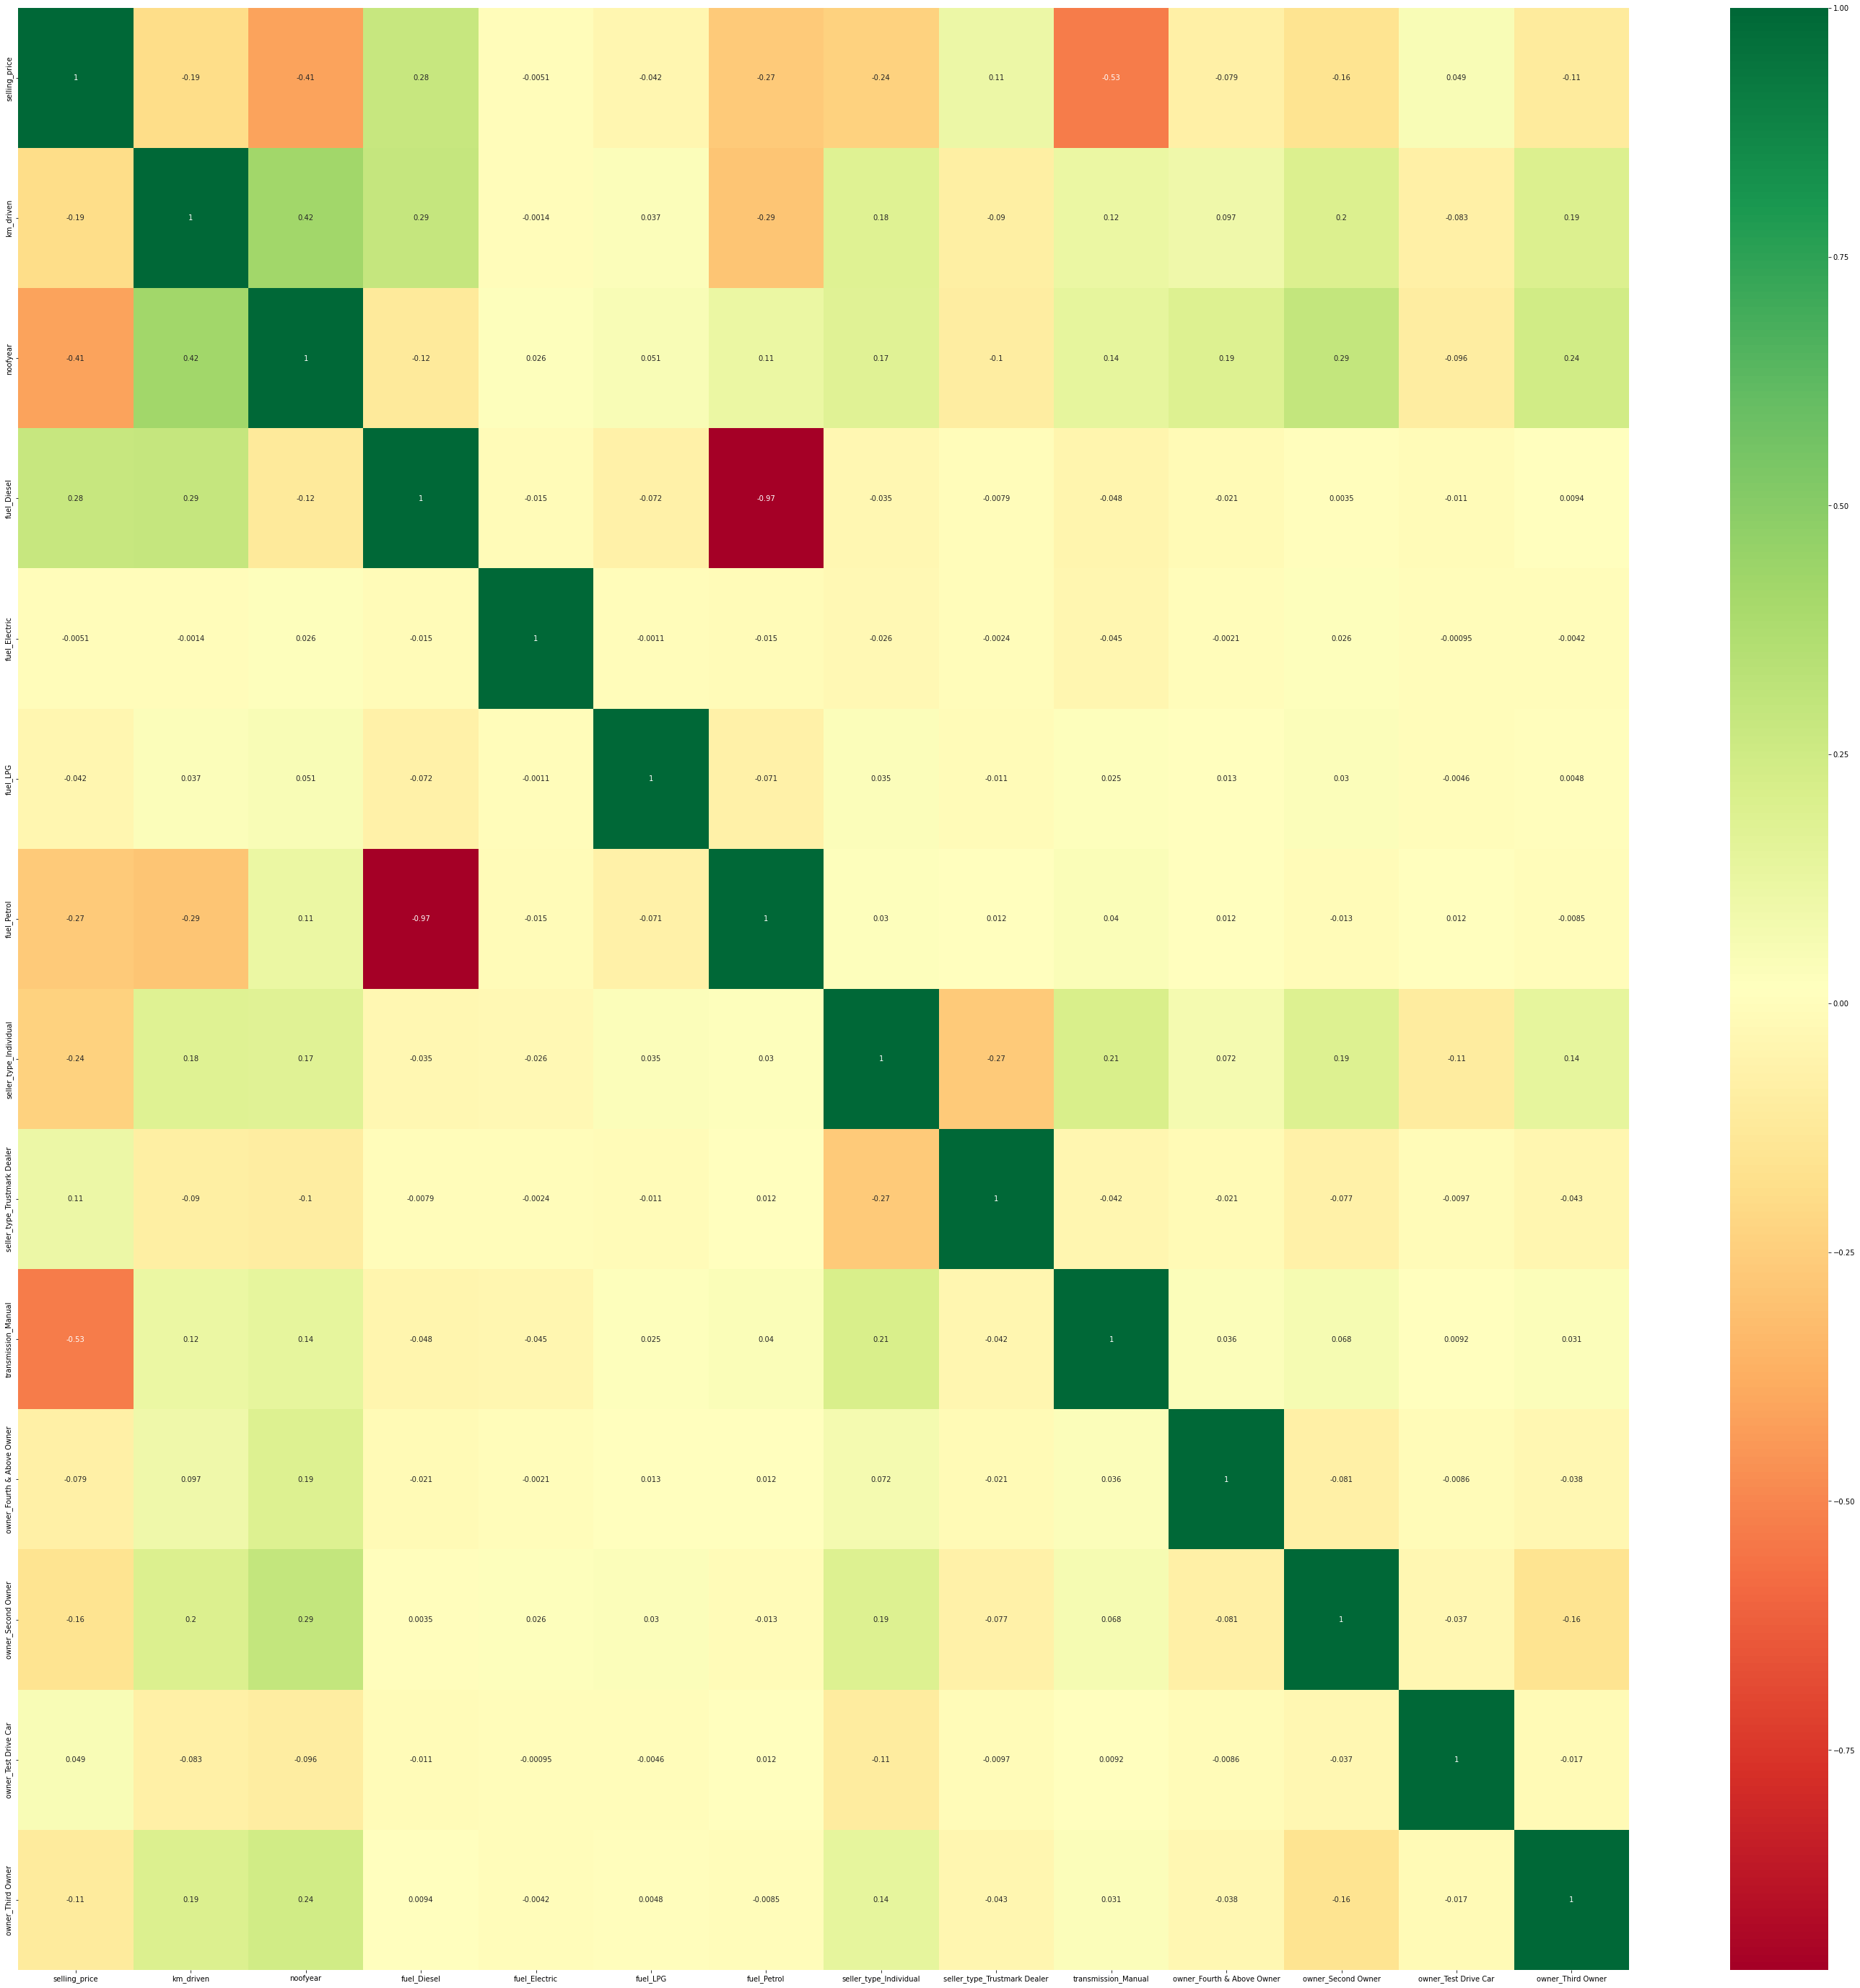

In [102]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot the heatmap
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')

In [103]:
final_dataset

,selling_price,km_driven,noofyear,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,13,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,6,1,0,0,0,1,0,1,0,0,0,0


In [104]:
#to seperate theindependent and dependent features
x = final_dataset.iloc[:,1:]
x.drop([ 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol',  'seller_type_Trustmark Dealer', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],axis = 1, inplace = True)

In [105]:
x.head()

,km_driven,noofyear,fuel_Diesel,seller_type_Individual,transmission_Manual
0,70000,15,0,1,1
1,50000,15,0,1,1
2,100000,10,1,1,1
3,46000,5,0,1,1
4,141000,8,1,1,1


In [106]:
y = final_dataset.iloc[:,0]

In [107]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [108]:
#to find the important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [109]:
print(model.feature_importances_)

[0.26573529 0.26224807 0.13157532 0.04427551 0.29616582]


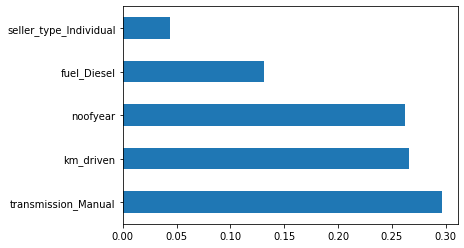

In [110]:
#to plot the graph of feature importance for better visualization
feat_importance = pd.Series(model.feature_importances_,index = x.columns)
feat_importance.nlargest(5).plot(kind = 'barh')
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [112]:
x_train.shape

(3472, 5)

In [113]:
x_test.shape

(868, 5)

In [114]:
x_train.head()


,km_driven,noofyear,fuel_Diesel,seller_type_Individual,transmission_Manual
227,20000,5,1,1,1
964,50000,4,1,1,1
2045,25000,9,0,1,1
1025,70000,11,1,1,1
4242,72000,5,1,0,1


In [115]:
x_train.columns

Index(['km_driven', 'noofyear', 'fuel_Diesel', 'seller_type_Individual',
       'transmission_Manual'],
      dtype='object')

In [116]:
y_train.shape

(3472,)

In [117]:
y_test.shape

(868,)

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [119]:
#hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 1,stop = 20,num =2)]
print(n_estimators)

[1, 20]


In [120]:
#randomized search cv
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1,stop = 20,num =2)]
#number of features to consider at every split
max_features =['auto','sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1,stop = 20,num =2)]
#maximum_depth.append(none)
#minimum number of samples required to split the node
min_sample_split = [int(x) for x in np.linspace(start = 1,stop = 20,num =2)]

#minimum number of samples required to leaf the node
min_sample_leaf = [int(x) for x in np.linspace(start = 1,stop = 20,num =2)]


In [121]:
#to find out the best parameters
from sklearn.model_selection import RandomizedSearchCV

In [122]:
#create the random grid
random_grid = {'n_estimators':n_estimators,
'max_features':max_features,'max_depth':max_depth}

In [123]:

random_grid

{'n_estimators': [1, 20],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [1, 20]}

In [124]:
rf = RandomForestRegressor()

In [125]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring ='neg_mean_squared_error',n_iter=8,cv = 2,random_state = 42,n_jobs = 1 )

In [126]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=8, n_jobs=1,
                   param_distributions={'max_depth': [1, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [1, 20]},
                   random_state=42, scoring='neg_mean_squared_error')

In [127]:
predictions = rf_random.predict(x_test)

In [128]:
predictions

array([ 144707.5       ,  348850.        ,  134840.27777778,
        475538.88888889, 1587288.13846154,  229958.03333333,
        423500.        ,   79953.64255189,  583330.37484127,
        254000.        ,  698441.66666667,  561438.29365079,
        521961.74136321,   77928.57142857,  675625.        ,
        525447.55591631,  692650.        , 1597520.        ,
        158202.76546982,  912500.        ,  652699.30273102,
        954336.63419913,  399257.44047619,  955375.        ,
        243500.        ,  521961.74136321,  620708.33333333,
        299429.36507937,  340121.30402277,  424716.66666667,
        167116.66666667, 1115900.        ,  602500.        ,
        767249.975     ,  578000.        ,  328495.19875221,
       1163753.47222222,  431422.61904762,  184683.17565407,
        382074.98      ,  599490.97222222,  406566.66666667,
        719018.04479548,  279512.85571429,  222368.14651851,
        248425.96792097,  341242.26006192,  513305.55555556,
        736347.61904762,

c:\Users\santhosh s\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

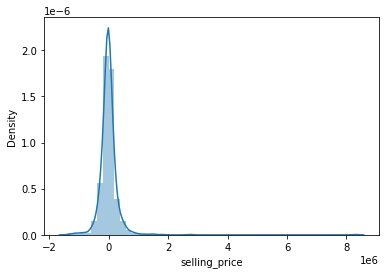

In [129]:
sns.distplot(y_test-predictions)#to check the predict result

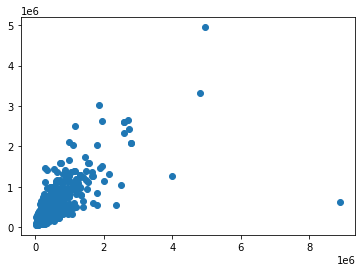

In [130]:
plt.scatter(y_test,predictions)

In [131]:
import pickle
file = open('random_model.pkl','wb')


In [132]:
pickle.dump(rf_random,file)
file.close()